In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans 
import warnings
warnings.filterwarnings('ignore')

In [179]:
df=pd.read_excel("C:/Users/user/Desktop/PGDSBA/MRA/Project MRA/Sales_Data.xlsx")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [180]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [182]:
df.shape

(2747, 20)

In [183]:
df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
MSRP,2747.0,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


In [184]:
df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
ORDERNUMBER,2747.0,NaN,NaN,NaN,10259.761558,10100.0,10181.0,10264.0,10334.5,10425.0,91.877521
QUANTITYORDERED,2747.0,NaN,NaN,NaN,35.103021,6.0,27.0,35.0,43.0,97.0,9.762135
PRICEEACH,2747.0,NaN,NaN,NaN,101.098951,26.88,68.745,95.55,127.1,252.87,42.042548
ORDERLINENUMBER,2747.0,NaN,NaN,NaN,6.491081,1.0,3.0,6.0,9.0,18.0,4.230544
SALES,2747.0,NaN,NaN,NaN,3553.047583,482.13,2204.35,3184.8,4503.095,14082.8,1838.953901
ORDERDATE,2747,NaN,NaN,NaN,2019-05-13 21:56:17.211503360,2018-01-06 00:00:00,2018-11-08 00:00:00,2019-06-24 00:00:00,2019-11-17 00:00:00,2020-05-31 00:00:00,NaN
DAYS_SINCE_LASTORDER,2747.0,NaN,NaN,NaN,1757.085912,42.0,1077.0,1761.0,2436.5,3562.0,819.280576
STATUS,2747,6,Shipped,2541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTLINE,2747,7,Classic Cars,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSRP,2747.0,NaN,NaN,NaN,100.691664,33.0,68.0,99.0,124.0,214.0,40.114802


In [185]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [186]:
df_cat = df.select_dtypes(include = ['object'])
df_num = df.select_dtypes(include = ['float64', 'int64'])

# EDA

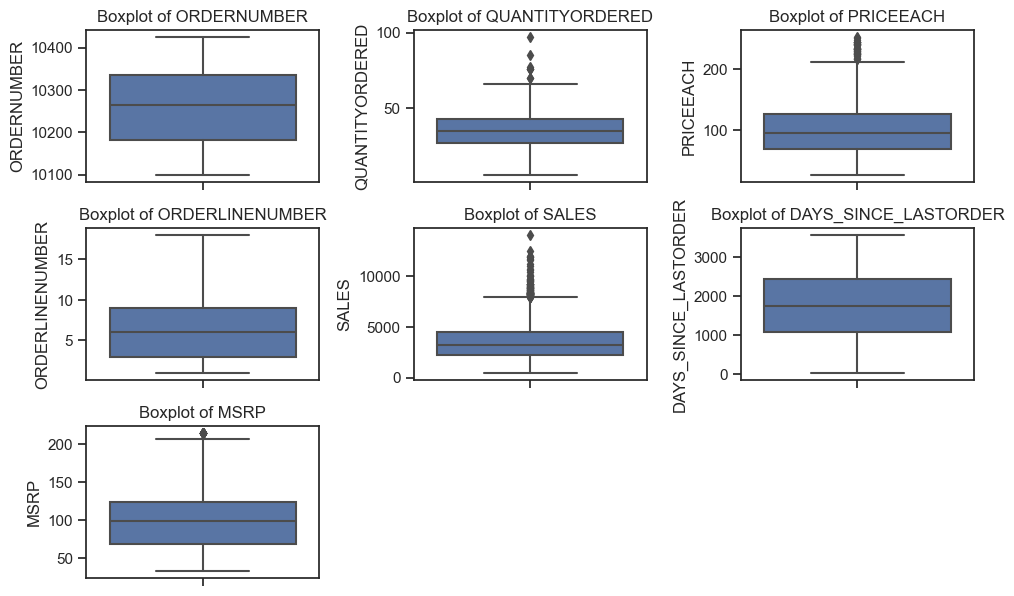

In [187]:
#Check for presence of outliers in each feature
plt.figure(figsize = (10,10))
plt.title("Boxplot of Numerical Values")
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

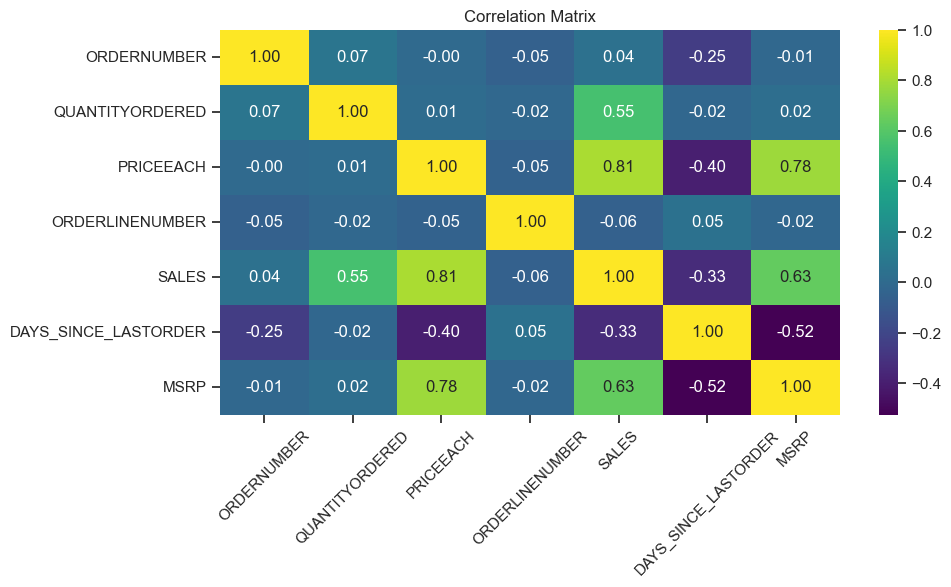

In [188]:
#check for presence of correlations
plt.figure(figsize=(10,5))
plt.title("Correlation Matrix")
plt.get_cmap("plasma")
sns.heatmap(df_num.corr(), annot=True, fmt='.2f', cmap = 'viridis')


plt.xticks(rotation=45 );


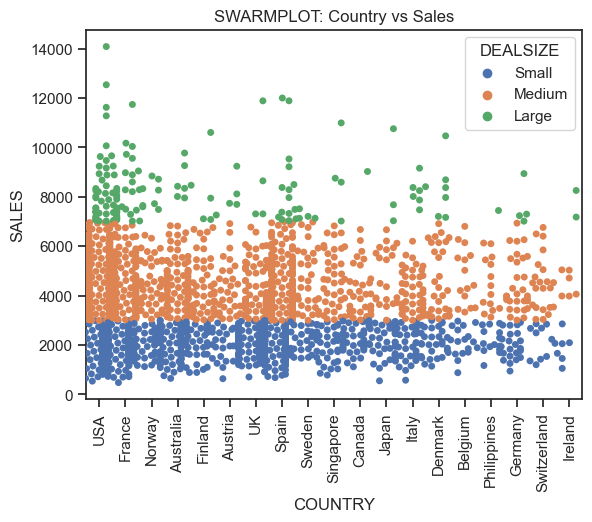

In [203]:
#check for presence of correlations
plt.title( 'SWARMPLOT: Country vs Sales')
sns.swarmplot(data=df, x= 'COUNTRY', y= "SALES", hue='DEALSIZE', dodge=True)
plt.xticks(rotation=90);

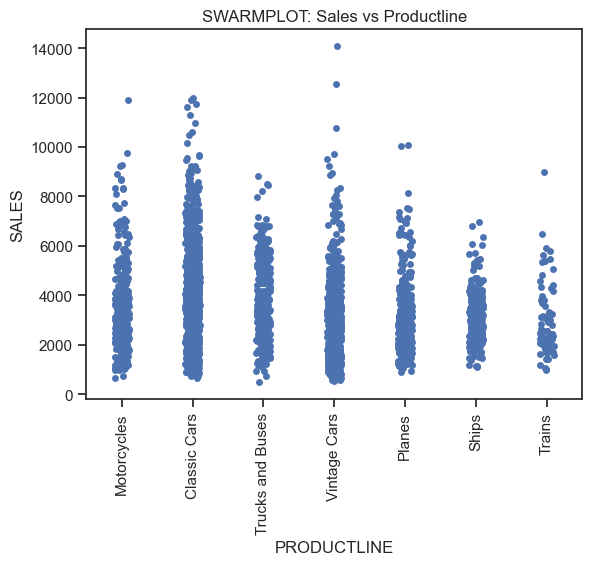

In [226]:
plt.title( 'SWARMPLOT: Sales vs Productline')
sns.stripplot(data=df, x= 'PRODUCTLINE', y= "SALES", jitter=True)
plt.xticks(rotation=90);

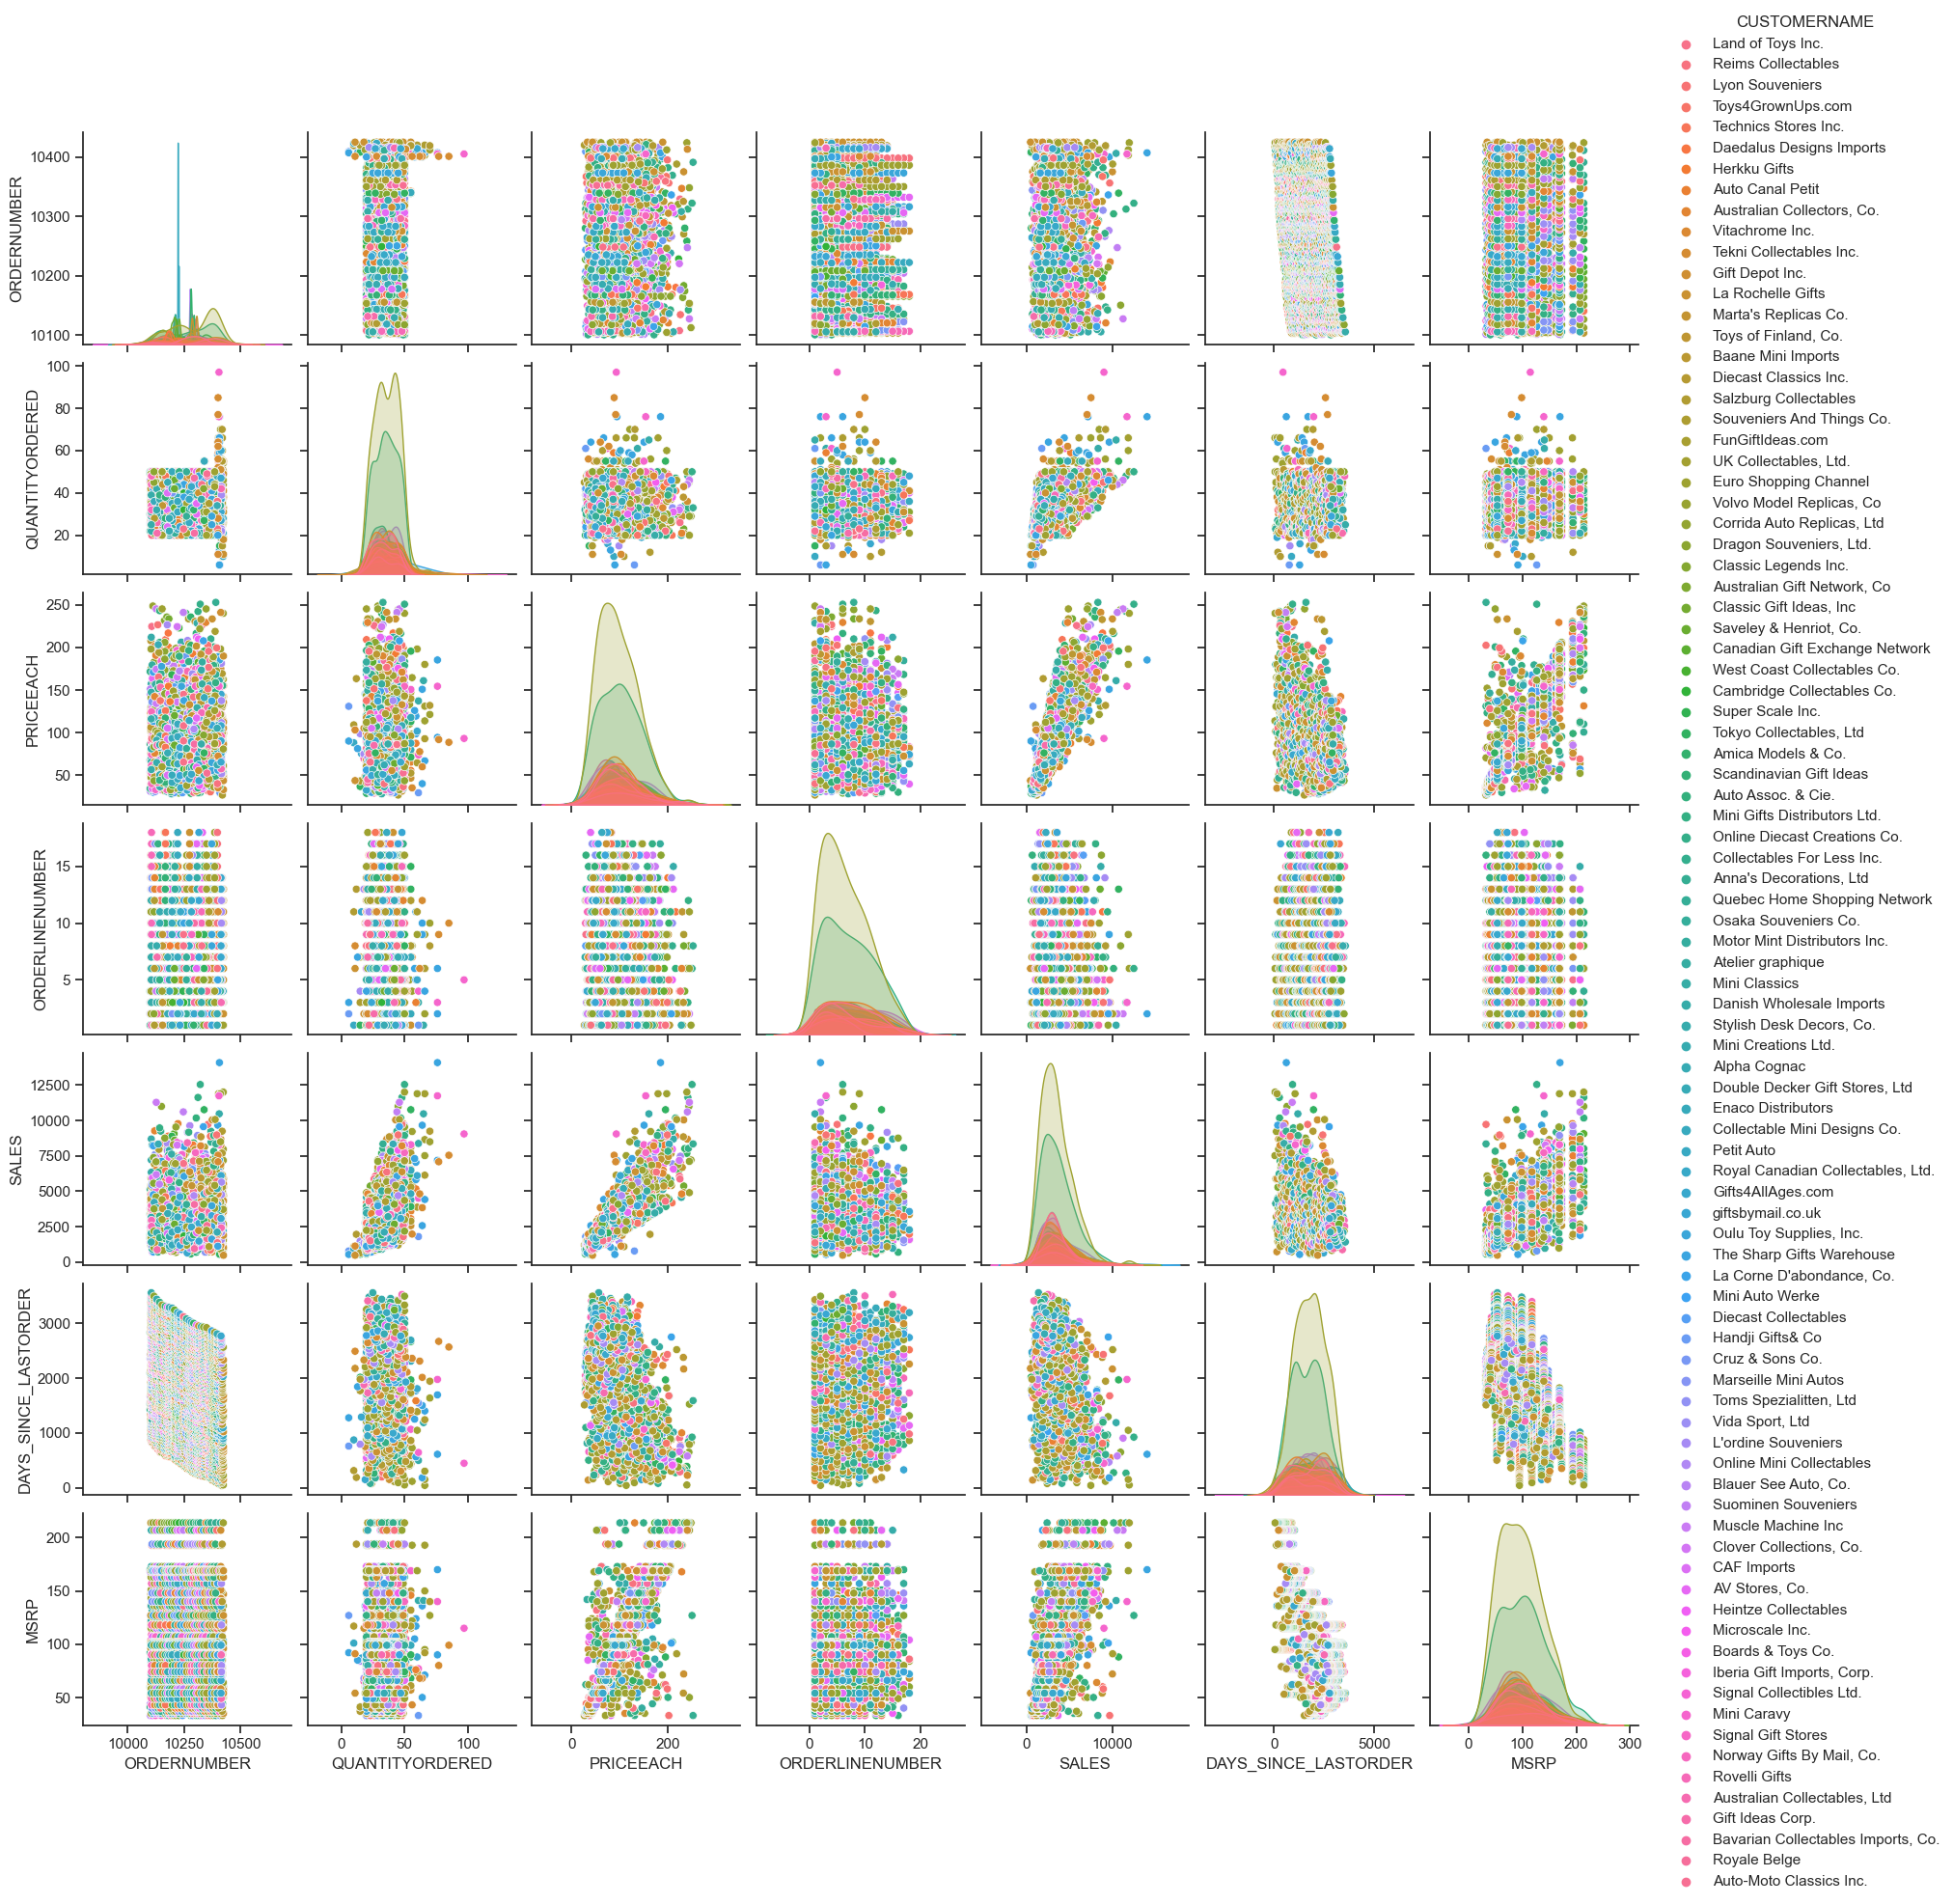

In [115]:
sns.pairplot(df,hue="CUSTOMERNAME")

Text(0, 0.5, 'Count')

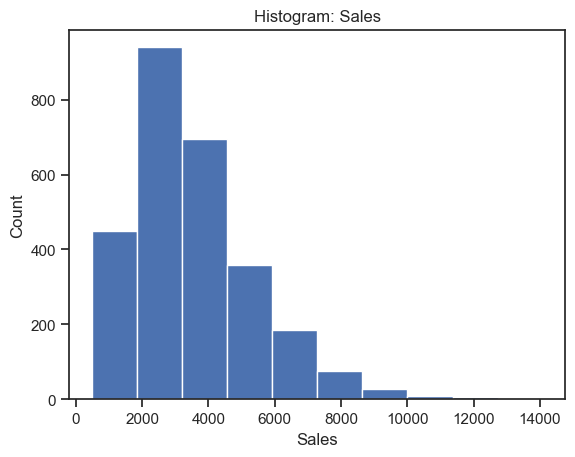

In [116]:
plt.hist(df["SALES"])
plt.title('Histogram: Sales')
plt.xlabel("Sales")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

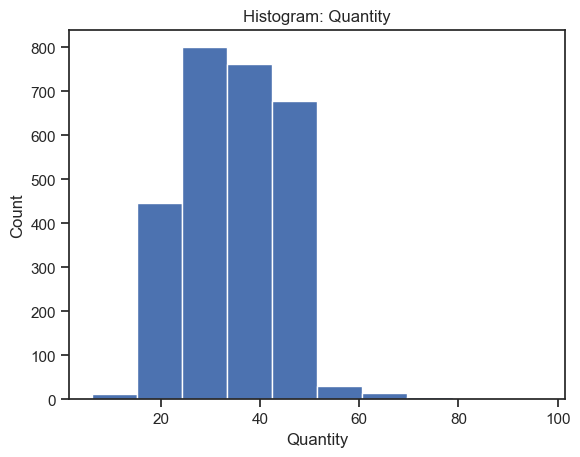

In [117]:
plt.hist(df["QUANTITYORDERED"])
plt.title('Histogram: Quantity')
plt.xlabel("Quantity")
plt.ylabel("Count")

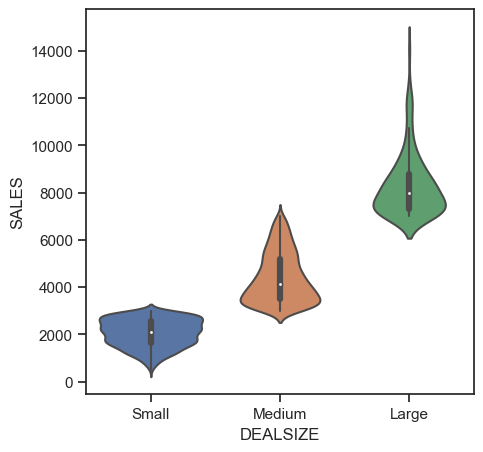

In [118]:
plt.figure(figsize=(5,5))

ax=sns.violinplot(x =df['DEALSIZE'], y=df['SALES'])     
     
# visualizing the plot
plt.show()

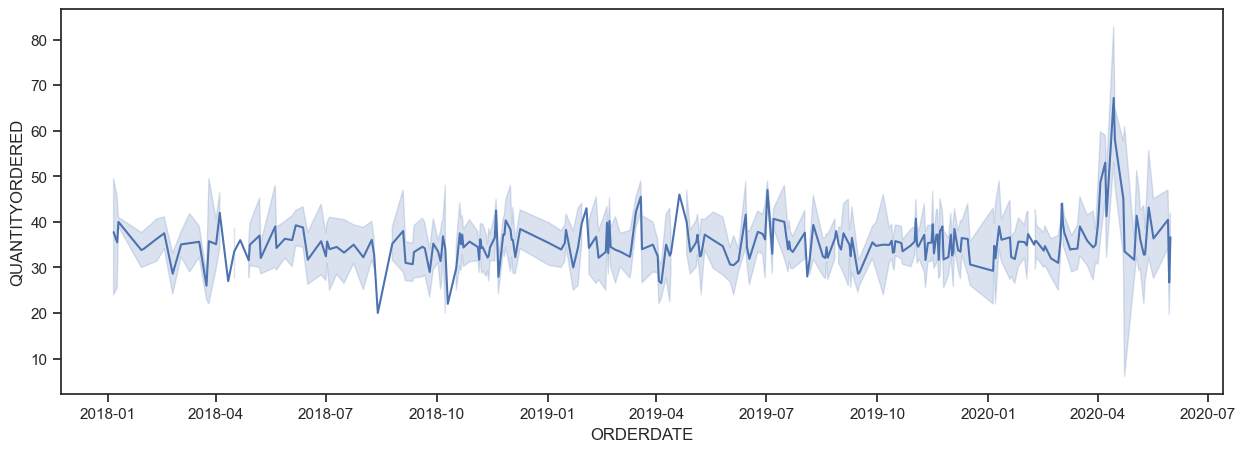

In [119]:
plt.figure(figsize=(15,5))

sns.lineplot(y=df['QUANTITYORDERED'], x=df['ORDERDATE'])     
     
# visualizing the plot
plt.show()

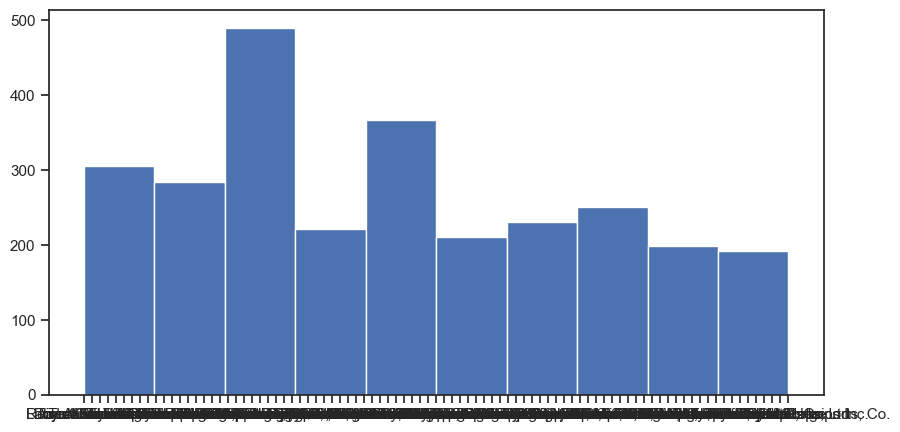

In [120]:
plt.figure(figsize=(10,5))

plt.hist(df['CUSTOMERNAME'])     

# visualizing the plot
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Norway'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Finland'),
  Text(5, 0, 'Austria'),
  Text(6, 0, 'UK'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'Sweden'),
  Text(9, 0, 'Singapore'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Japan'),
  Text(12, 0, 'Italy'),
  Text(13, 0, 'Denmark'),
  Text(14, 0, 'Belgium'),
  Text(15, 0, 'Philippines'),
  Text(16, 0, 'Germany'),
  Text(17, 0, 'Switzerland'),
  Text(18, 0, 'Ireland')])

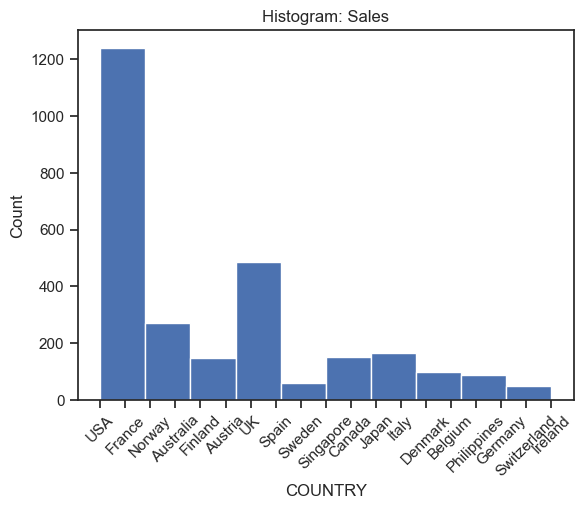

In [121]:
plt.hist(df["COUNTRY"])
plt.title('Histogram: Sales')
plt.xlabel("COUNTRY")
plt.ylabel("Count")
plt.xticks(rotation = 45)

## PART B

In [122]:

df2=pd.read_csv("C:\\Users\\user\\Desktop\\PGDSBA\\MRA\\Project MRA\\dataset_group.csv")

In [210]:
df2.shape

(20641, 3)

In [211]:
df2.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [125]:
df2.tail()

,Date,Order_id,Product
20636,25-02-2020,1138,soda
20637,25-02-2020,1138,paper towels
20638,26-02-2020,1139,soda
20639,26-02-2020,1139,laundry detergent
20640,26-02-2020,1139,shampoo


In [212]:
df2['Product'].value_counts()

Product
poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
flour                           555
butter                          555
milk                            555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas           

In [213]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [128]:
df2.describe()

,Order_id
count,20641.000000
mean,575.986289
std,328.557078
min,1.000000
25%,292.000000
50%,581.000000
75%,862.000000
max,1139.000000


In [135]:
df2.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [136]:
df2.value_counts().head(5)

Date        Order_id  Product        
21-04-2018  215       soap               6
10-04-2019  733       soap               6
17-05-2018  270       soda               5
09-01-2019  550       sandwich loaves    5
01-02-2020  1102      paper towels       5
Name: count, dtype: int64

In [137]:
all_words=[i for i in ' '.join(df2['Product']).split()]

words=pd.DataFrame(data=all_words, columns=['words'])

words.value_counts().head(40)

words           
paper               1125
soap                1076
sandwich            1059
poultry              640
soda                 597
cereals              591
cream                579
ice                  579
cheeses              578
waffles              575
meat                 573
bagels               573
lunch                573
juice                570
eggs                 570
toilet               569
rolls                567
dinner               567
foil                 566
aluminum             566
coffee/tea           565
shampoo              562
beef                 561
towels               556
milk                 555
butter               555
flour                555
mixes                554
all-                 551
liquid/detergent     551
dishwashing          551
purpose              551
ketchup              548
yogurt               545
meals                544
individual           544
tortillas            543
pasta                542
laundry              542
detergen

In [138]:
!pip install wordcloud

In [140]:

from wordcloud import WordCloud
wcloud = ' '.join(df2['Product'])
wcloud

'yogurt pork sandwich bags lunch meat all- purpose flour soda butter beef aluminum foil all- purpose dinner rolls shampoo all- purpose mixes soap laundry detergent ice cream dinner rolls toilet paper shampoo hand soap waffles cheeses mixes milk sandwich bags laundry detergent dishwashing liquid/detergent waffles individual meals hand soap individual meals yogurt cereals shampoo aluminum foil tortillas mixes soda pork soap ice cream toilet paper dinner rolls hand soap spaghetti sauce milk ketchup sandwich loaves poultry toilet paper ice cream ketchup laundry detergent spaghetti sauce bagels soap ice cream shampoo lunch meat cereals spaghetti sauce pork cheeses eggs cereals juice lunch meat soda toilet paper all- purpose sandwich loaves pasta tortillas mixes hand soap toilet paper paper towels flour pork poultry eggs pork spaghetti sauce milk waffles individual meals dinner rolls all- purpose soda yogurt laundry detergent toilet paper eggs toilet paper bagels dishwashing liquid/detergent

Word Cloud for Speech!


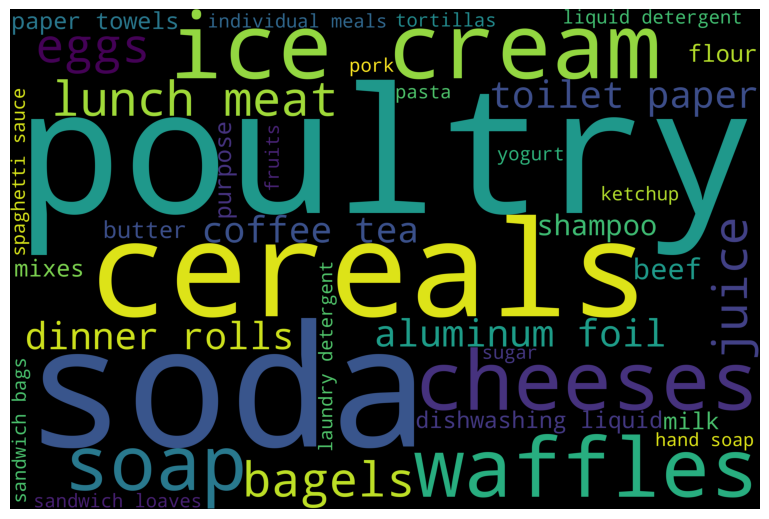

In [141]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wcloud) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Speech!")
plt.show()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'yogurt'),
  Text(1, 0, 'pork'),
  Text(2, 0, 'sandwich bags'),
  Text(3, 0, 'lunch meat'),
  Text(4, 0, 'all- purpose'),
  Text(5, 0, 'flour'),
  Text(6, 0, 'soda'),
  Text(7, 0, 'butter'),
  Text(8, 0, 'beef'),
  Text(9, 0, 'aluminum foil'),
  Text(10, 0, 'dinner rolls'),
  Text(11, 0, 'shampoo'),
  Text(12, 0, 'mixes'),
  Text(13, 0, 'soap'),
  Text(14, 0, 'laundry detergent'),
  Text(15, 0, 'ice cream'),
  Text(16, 0, 'toilet paper'),
  Text(17, 0, 'hand soap'),
  Text(18, 0, 'waffles'),
  Text(19, 0, 'cheeses'),
  Text(20, 0, 'milk'),
  Text(21, 0, 'dishwashing liquid/detergent'),
  Text(22, 0, 'individual meals'),
  Text(23, 0, 'cereals'),
  Text(24, 0, 'tortillas'),
  Text(25, 0, 'spaghetti sauce'),
  Text(26, 0, 'ketchup'),
  Text(27, 0, 'sandwich loaves')

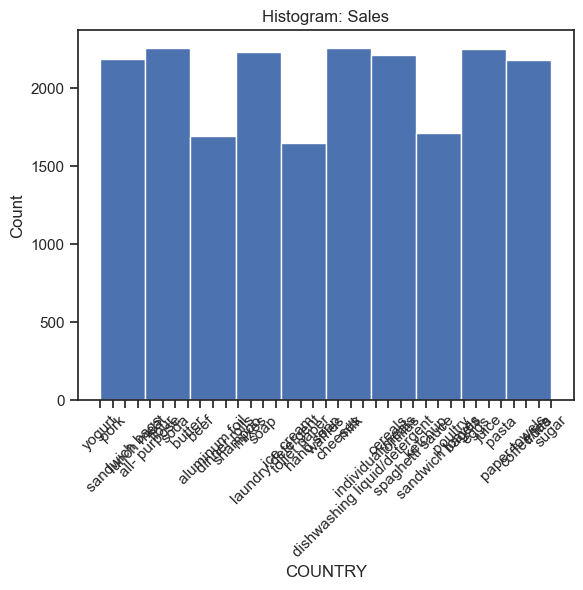

In [142]:
plt.hist(df2["Product"])
plt.title('Histogram: Sales')
plt.xlabel("COUNTRY")
plt.ylabel("Count")
plt.xticks(rotation = 45)

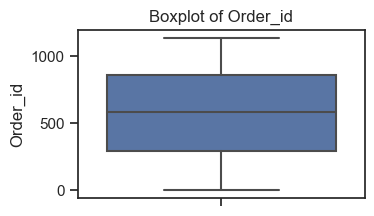

In [143]:

df_cat = df2.select_dtypes(include = ['object'])
df_num = df2.select_dtypes(include = ['float64', 'int64'])

#Check for presence of outliers in each feature
plt.figure(figsize = (10,10))
plt.title("Boxplot of Numerical Values")
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [144]:
df2.columns

Index(['Date', 'Order_id', 'Product'], dtype='object')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36],
 [Text(0, 0, 'yogurt'),
  Text(1, 0, 'pork'),
  Text(2, 0, 'sandwich bags'),
  Text(3, 0, 'lunch meat'),
  Text(4, 0, 'all- purpose'),
  Text(5, 0, 'flour'),
  Text(6, 0, 'soda'),
  Text(7, 0, 'butter'),
  Text(8, 0, 'beef'),
  Text(9, 0, 'aluminum foil'),
  Text(10, 0, 'dinner rolls'),
  Text(11, 0, 'shampoo'),
  Text(12, 0, 'mixes'),
  Text(13, 0, 'soap'),
  Text(14, 0, 'laundry detergent'),
  Text(15, 0, 'ice cream'),
  Text(16, 0, 'toilet paper'),
  Text(17, 0, 'hand soap'),
  Text(18, 0, 'waffles'),
  Text(19, 0, 'cheeses'),
  Text(20, 0, 'milk'),
  Text(21, 0, 'dishwashing liquid/detergent'),
  Text(22, 0, 'individual meals'),
  Text(23, 0, 'cereals'),
  Text(24, 0, 'tortillas'),
  Text(25, 0, 'spaghetti sauce'),
  Text(26, 0, 'ketchup'),
  Text(27, 0, 'sandwich loaves')

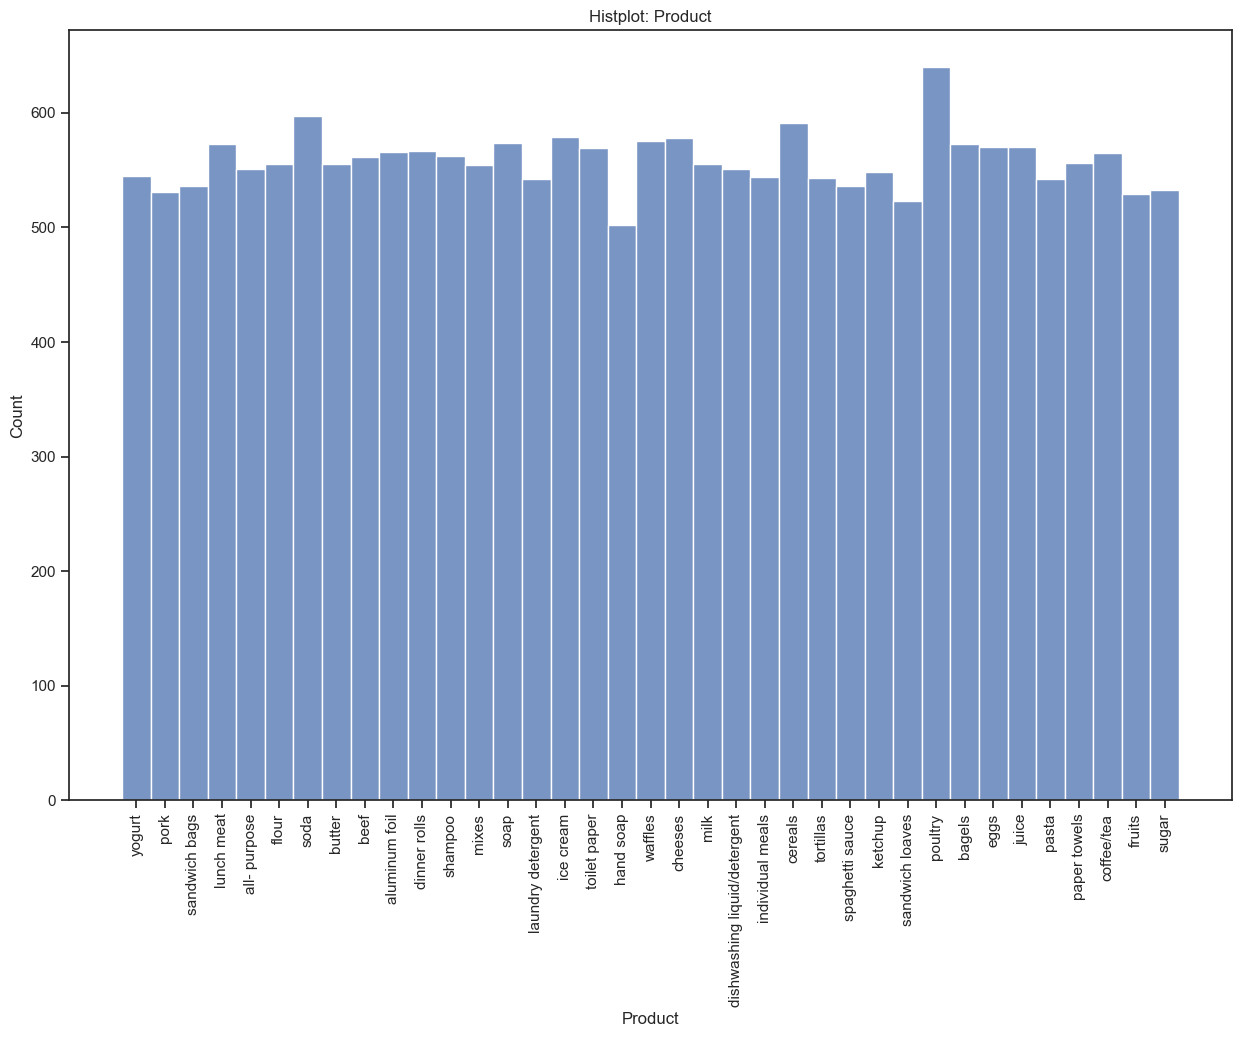

In [166]:
plt.figure(figsize =(15,10))
plt.title('Histplot: Product')

sns.histplot(x='Product', data=df2)
plt.xticks(rotation=90)


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(-200.0, 0, '−200'),
  Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

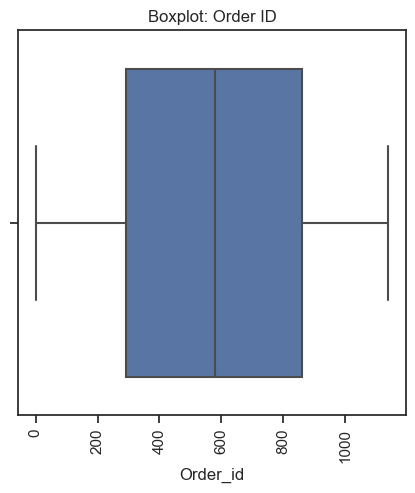

In [168]:
plt.figure(figsize =(5,5))
plt.title('Boxplot: Order ID')

sns.boxplot(x='Order_id', data=df2)
plt.xticks(rotation=90)

TypeError: Series.corr() missing 1 required positional argument: 'other'

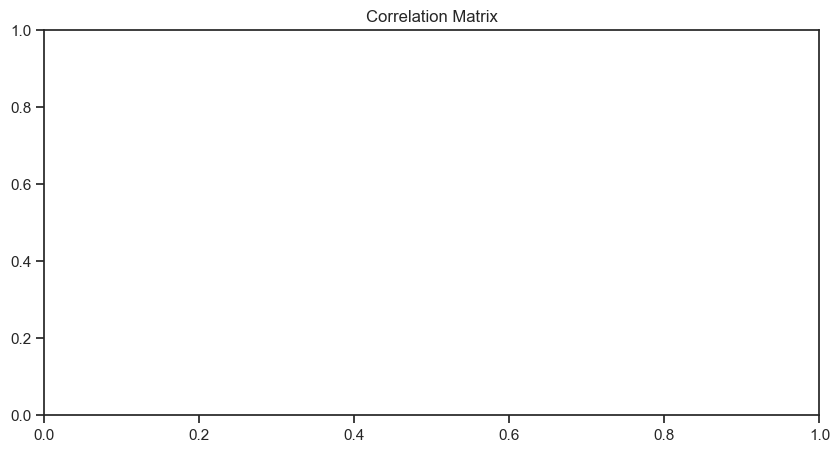

In [234]:
#check for presence of correlations
plt.figure(figsize=(10,5))
plt.title("Correlation Matrix")
plt.get_cmap("plasma")
sns.heatmap(df2['Order_id'].corr(), annot=True, fmt='.2f', cmap = 'viridis')


plt.xticks(rotation=45 );

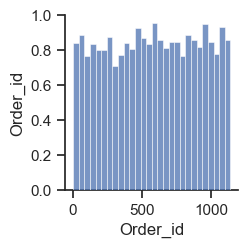

In [231]:
sns.pairplot(df2)